<a href="https://colab.research.google.com/github/ignadr/ML-Algorithms-Manual/blob/main/horsepower_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

from ucimlrepo import fetch_ucirepo

In [ ]:
auto_mpg = fetch_ucirepo(id=9)

In [ ]:
features = auto_mpg.data.features
targets = auto_mpg.data.targets

## Checking null values

In [ ]:
# Check null values
print(features.isnull().sum())

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [ ]:
# Try imputing with median
features.loc[:, 'horsepower'] = features['horsepower'].fillna(features['horsepower'].median())

In [ ]:
# Check null values again
print(f"{features.isnull().sum()}\n")
print(targets.isnull().sum())

displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

mpg    0
dtype: int64


In [ ]:
x = np.array(features)
y = np.array(targets['mpg'])

print(f"x: {x[0:5, :]}")
print(f"x.shape: {x.shape}")
print(f"y: {y[0:5]}")

x: [[3.070e+02 8.000e+00 1.300e+02 3.504e+03 1.200e+01 7.000e+01 1.000e+00]
 [3.500e+02 8.000e+00 1.650e+02 3.693e+03 1.150e+01 7.000e+01 1.000e+00]
 [3.180e+02 8.000e+00 1.500e+02 3.436e+03 1.100e+01 7.000e+01 1.000e+00]
 [3.040e+02 8.000e+00 1.500e+02 3.433e+03 1.200e+01 7.000e+01 1.000e+00]
 [3.020e+02 8.000e+00 1.400e+02 3.449e+03 1.050e+01 7.000e+01 1.000e+00]]
x.shape: (398, 7)
y: [18. 15. 18. 16. 17.]


## Plotting each features

[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


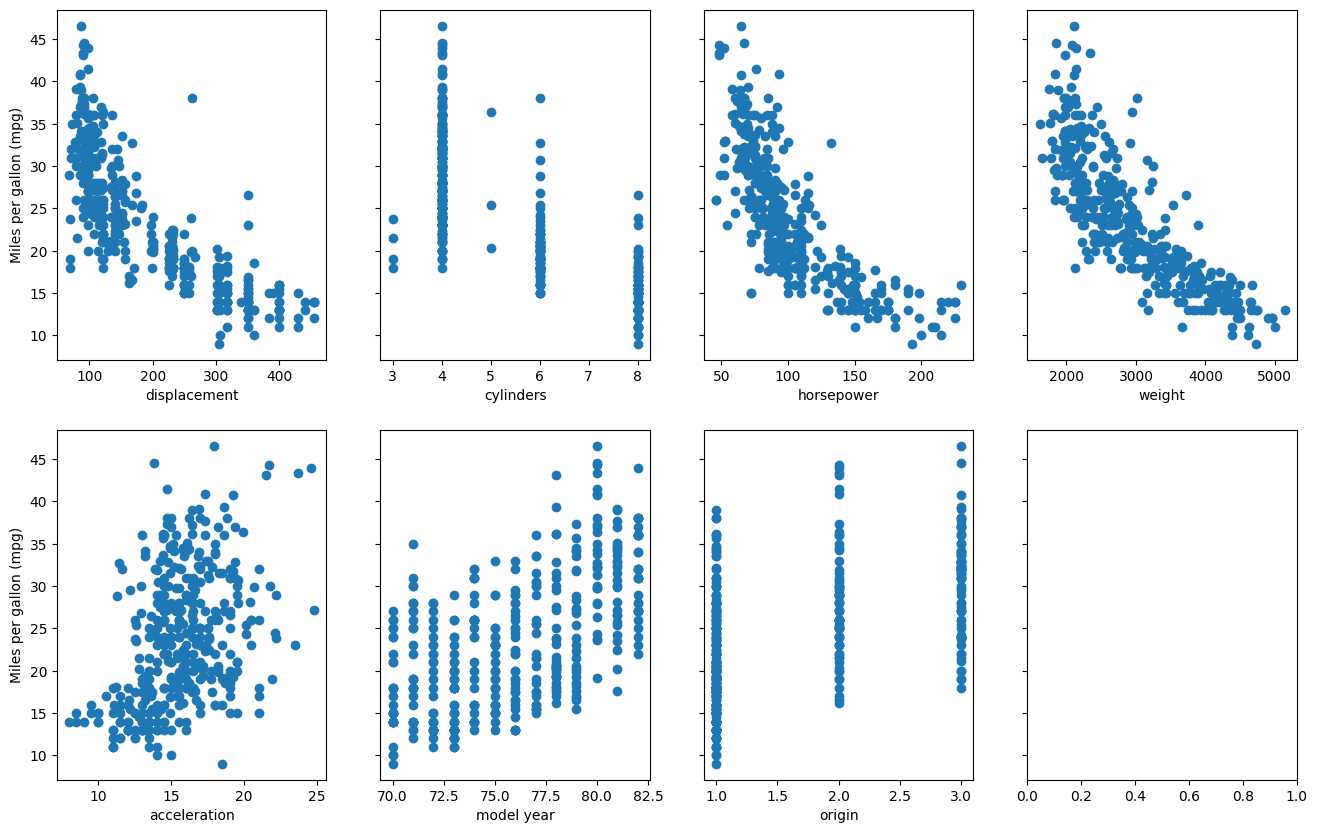

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(16, 10), sharey=True) # Increased figure size
x_features = np.array(['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'])
print(ax)

# Because ax is 2D array (because in plt.subplots, I choose 2 x 4 for the dimension of the plot), we have to flatten it
# Flatten = 2D array becoming 1D array
ax = ax.flatten()
print(ax)

for i in range(len(x_features)): # Iterate only through the features
  ax[i].scatter(x[:, i], y)
  ax[i].set_xlabel(x_features[i])

ax[0].set_ylabel("Miles per gallon (mpg)")
ax[4].set_ylabel("Miles per gallon (mpg)")

# plt.tight_layout()
plt.show()

## Normalize the features using Z-score

In [ ]:
def zscore_normalization(x):
  # Find the mean of each features
  mean = np.mean(x, axis=0)

  # Find the standard deviation of each features
  sigma = np.std(x, axis=0)

  x = (x - mean) / sigma

  return x

In [ ]:
x_norm = zscore_normalization(x)
print(x_norm[0:5, :])

[[ 1.0906037   1.49819126  0.67311762  0.63086987 -1.29549834 -1.62742629
  -0.71514478]
 [ 1.5035143   1.49819126  1.58995818  0.85433297 -1.47703779 -1.62742629
  -0.71514478]
 [ 1.19623199  1.49819126  1.19702651  0.55047045 -1.65857724 -1.62742629
  -0.71514478]
 [ 1.06179598  1.49819126  1.19702651  0.54692342 -1.29549834 -1.62742629
  -0.71514478]
 [ 1.04259084  1.49819126  0.93507207  0.56584093 -1.84011669 -1.62742629
  -0.71514478]]


In [ ]:
w = np.array([0.6374725, 0.4262998, 0.71082884, 0.39119311, 0.92316041, 0.88837015, 0.57340149])
b = 0.3

print(f"w: {w}")
print(f"w.shape: {w.shape}")
print(f"b: {b}")

w: [0.6374725  0.4262998  0.71082884 0.39119311 0.92316041 0.88837015
 0.57340149]
w.shape: (7,)
b: 0.3


In [ ]:
def compute_model_output(x, w, b):
  f_wb = np.dot(x, w) + b
  return f_wb

In [ ]:
# temp_f_wb = compute_model_output(x, w, b)

# plt.plot(x, temp_f_wb, c='b')
# plt.scatter(x, y, marker='x', c='r')

# plt.xlabel("Horsepower")
# plt.ylabel("Miles per gallon(MPG)")
# plt.title("Horsepower vs. Miles per gallon")

# plt.show()

In [ ]:
def compute_cost(x, y, w, b):
  m = x.shape[0]

  cost_sum = 0

  for i in range(m):
    f_wb_i = np.dot(x[i], w) + b
    cost_sum = cost_sum + ((f_wb_i - y[i]) ** 2)

  total_cost = cost_sum / (2 * m)

  return total_cost

## Gradient Descent

In [ ]:
def compute_gradient(x, y, w, b):
  m, n = x.shape
  dj_dw = np.zeros((n,))
  dj_db = 0

  for i in range(m):
    err = np.dot(x[i], w) + b - y[i]
    for j in range(n):
      dj_dw[j] = dj_dw[j] + (err * x[i, j])
    dj_db = dj_db + err

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iter, cost_function, gradient_function):
  # Variable to store the cost in each iterations
  J_hist = []

  w = w_init
  b = b_init

  for i in range(num_iter):
    dj_dw, dj_db = gradient_function(x, y, w, b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    J_hist.append(cost_function(x, y, w, b))

    if i % math.ceil(num_iter / 10) == 0:
      print(f"Iteration: {i}\t\tCost: {J_hist[i]:.3f}")

  return w, b, J_hist

In [ ]:
w_final, b_final, J_hist = gradient_descent(x_norm, y, w, b, 0.1, 10000, compute_cost, compute_gradient)

Iteration: 0		Cost: 234.418
Iteration: 1000		Cost: 5.456
Iteration: 2000		Cost: 5.455
Iteration: 3000		Cost: 5.455
Iteration: 4000		Cost: 5.455
Iteration: 5000		Cost: 5.455
Iteration: 6000		Cost: 5.455
Iteration: 7000		Cost: 5.455
Iteration: 8000		Cost: 5.455
Iteration: 9000		Cost: 5.455


In [ ]:
print(f"Final w: {w_final}")
print(f"Final b: {b_final}")
print(f"With cost: {J_hist[-1]}")

print()

# Print 5 predicted values with the actual target
y_pred = compute_model_output(x_norm, w_final, b_final)
print(f"First 10 predictions: {y_pred[0:10:1]}")
print(f"First 10 actual values: {y[0:10:1]}")

Final w: [ 1.9842761  -0.71432749 -0.47280617 -5.66449629  0.27020569  2.79111136
  1.14094161]
Final b: 23.514572864321597
With cost: 5.455405527833328

First 10 predictions: [15.00830083 14.07928273 15.32750541 15.17894539 15.01037361 10.68877894
 10.70748272 10.7348886  10.28720164 13.18600722]
First 10 actual values: [18. 15. 18. 16. 17. 15. 14. 14. 14. 15.]


In [ ]:
# final_f_wb = compute_model_output(x, w_final, b_final)

# plt.plot(x, final_f_wb, c='b')
# plt.scatter(x, y, marker='x', c='r', label="Actual values")

# plt.title("Horsepower vs. Miles per gallon")
# plt.xlabel("Horsepower")
# plt.ylabel("Miles per gallon")

# plt.show()

[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]


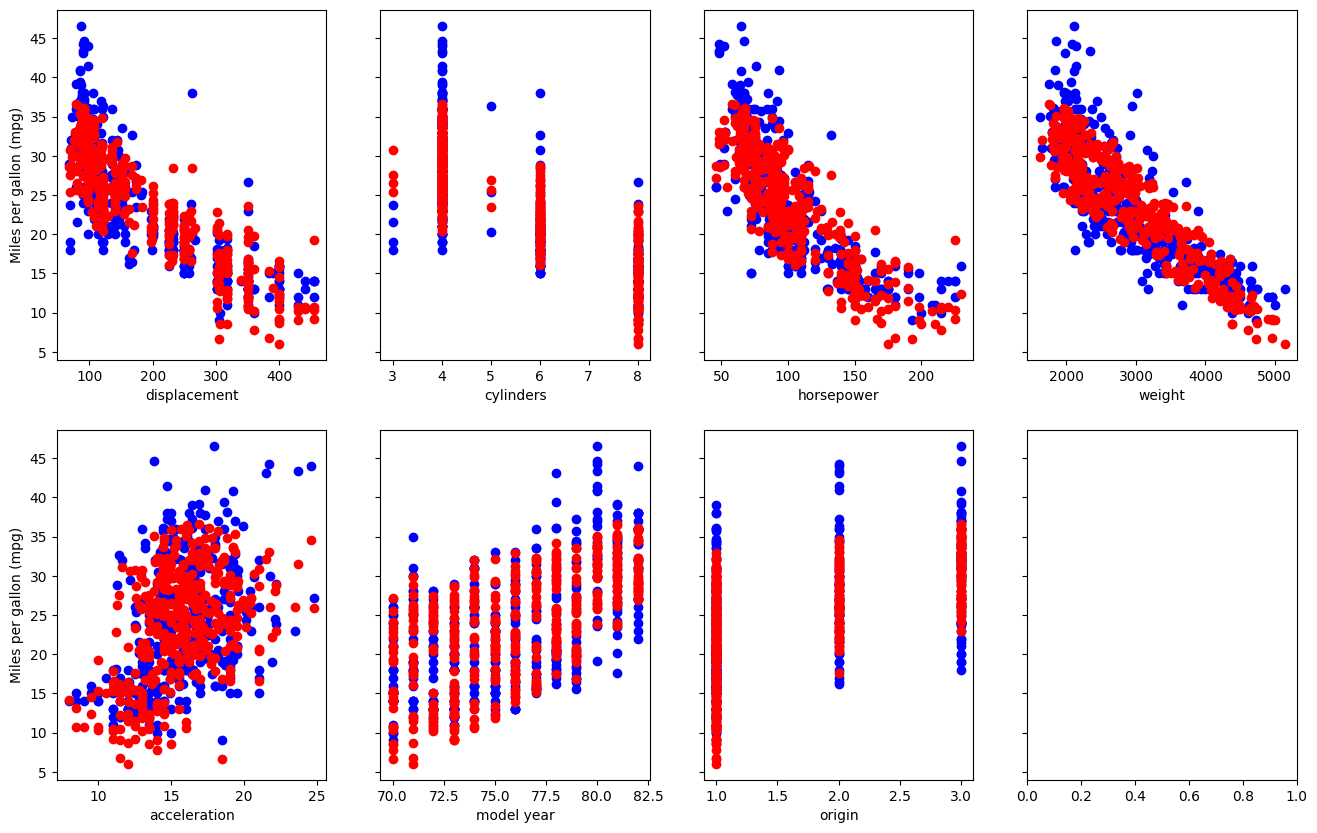

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(16, 10), sharey=True)

ax = ax.flatten()
print(ax)

for i in range(len(x_features)):
  ax[i].scatter(x[:, i], y, c='b', label="Actual values")
  ax[i].scatter(x[:, i], y_pred, c='r', label="Predictions")
  ax[i].set_xlabel(x_features[i])

ax[0].set_ylabel("Miles per gallon (mpg)")
ax[4].set_ylabel("Miles per gallon (mpg)")

plt.show()